In [ ]:
# следует реализовать выделение проблемных зубьев у шестеренки

from PIL import Image
import pylab as plt
import numpy as np
import cv2
%matplotlib inline

In [ ]:
# нужно если colab использует исключительно мощности компьютера
# на котором запускается проект

from google.colab import drive
drive.mount('/content/drive')

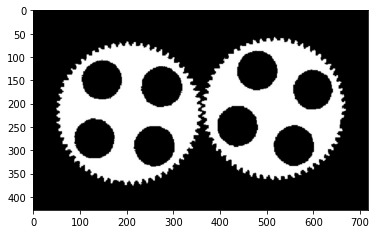

In [ ]:
import glob
img = cv2.imread('/content/drive/MyDrive/University/Computer Vision/lab3/image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # к серому
(T, thresh) = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU) # бинаризуем
plt.imshow(img, cmap='gray')

In [ ]:
binary = thresh.copy() # крпируем
mask = np.zeros((428+2, 718+2), np.uint8)
cv2.floodFill(thresh, mask, (0,0), 255) 

(167026, array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), (0, 0, 718, 428))

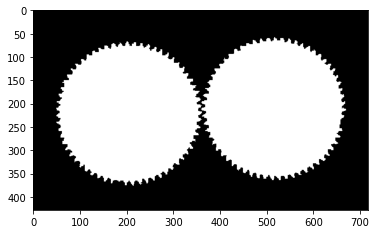

In [ ]:
# структурный эл. элипс

cv2.bitwise_not(thresh, thresh)
img2 = cv2.bitwise_or(binary, thresh) # к исходному добавляем
plt.imshow(img2, cmap='gray');

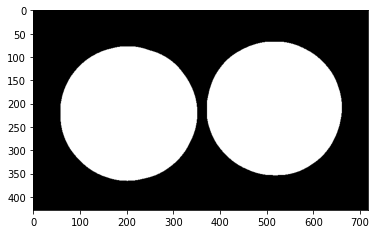

In [ ]:
# размыкание

erode_dilate_sizes = (250, 250)
img3 = cv2.erode(img2, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, erode_dilate_sizes)) # сужение
img4 = cv2.dilate(img3, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, erode_dilate_sizes)) # расширение
plt.imshow(img4, cmap='gray');

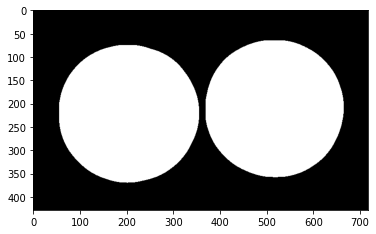

In [ ]:
# расширение

dilate_sizes = (8, 8)
img5 = cv2.dilate(img4, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, dilate_sizes))
plt.imshow(img5, cmap='gray');

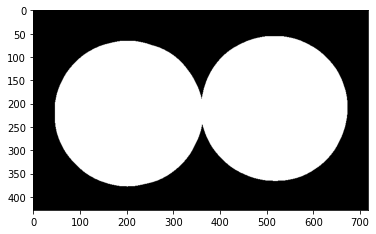

In [ ]:
# получаем ещё большее расширение, что бы при вычитании получить кольцо

big_dilate_sizes = (25, 25)
img6 = cv2.dilate(img4, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, big_dilate_sizes))
plt.imshow(img6, cmap='gray');

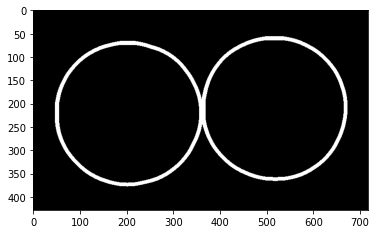

In [ ]:
# xor-им озображение для получения кольца

img7 = cv2.bitwise_xor(img5, img6)
plt.imshow(img7, cmap='gray');

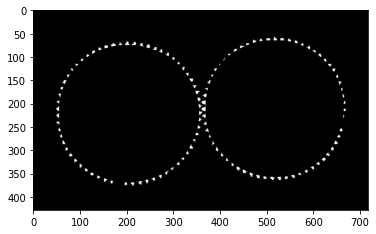

In [ ]:
# перемножаем кольца и исходное изображение

img8 = cv2.bitwise_and(gray, img7)
plt.imshow(img8, cmap='gray');

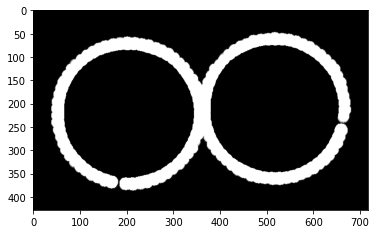

In [ ]:
# расширяем контур зубов

shape_dilate_sizes = (23, 23)
img9 = cv2.dilate(img8, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, shape_dilate_sizes))
plt.imshow(img9, cmap='gray');

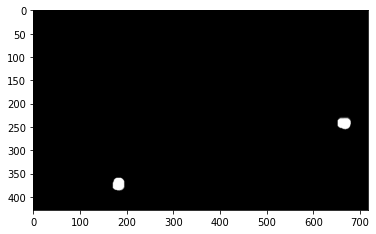

In [ ]:
# вычитаем из колец расширенное изображениеконтура зубцов для нахождения дефектов и расширяем его

img10 = cv2.subtract(img7, img9)

defects_dilate_sizes = (20, 20)
img11 = cv2.dilate(img10, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, defects_dilate_sizes))

plt.imshow(img11, cmap='gray');

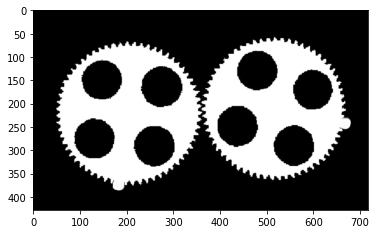

In [ ]:
# накладываем точки дефектов на исходное изображение

result = cv2.bitwise_or(gray, img11)
plt.imshow(result, cmap='gray');